In [1]:
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy

In [2]:
products =pd.DataFrame(pd.read_csv('products.csv'))
cops=pd.DataFrame(pd.read_csv('copurchase.csv'))

In [ ]:
products.head()

In [ ]:
cops.head()

In [3]:
g = nx.from_pandas_edgelist(cops, 'Source', 'Target')

In [ ]:
products.group.unique()

In [4]:
# create dfs for categories
books=products[(products['group']=='Book')]
books_cops=cops[cops.Source.isin(books.id) & cops.Target.isin(books.id)]

music=products[(products['group']=='Music')]
music_cops=cops[cops.Source.isin(music.id) & cops.Target.isin(music.id)]

dvds=products[(products['group']=='DVD')]
dvds_cops=cops[cops.Source.isin(dvds.id) & cops.Target.isin(dvds.id)]

videos=products[(products['group']=='Video')]
videos_cops=cops[cops.Source.isin(videos.id) & cops.Target.isin(videos.id)]


print("num books:", len(books.index))
print("num music:", len(music.index))
print("num dvds:", len(dvds.index))
print("num videos:", len(videos.index))


num books: 188013
num music: 48993
num dvds: 9554
num videos: 12597


## Look at degrees

In [5]:
nodes = [node for (node, val) in g.degree()]
degrees = [val for (node, val) in g.degree()]
d = np.array(degrees)

print("min degree:", min(d), ",node id:", nodes[np.argmin(d)]) # prob more than 1
print("max degree:", max(d), ",node id:", nodes[np.argmax(d)])
print("mean degree:", np.mean(d))
print("median degree:", np.median(d))

min degree: 1 ,node id: 289
max degree: 420 ,node id: 14949
mean degree: 6.865720499027126
median degree: 6.0


In [6]:
max_centrality_prod = products[products['id'] == nodes[np.argmax(d)]]
max_centrality_prod

,id,title,group,salesrank,review_cnt,downloads,rating
14805,14949,Fodor's Australia 2000,Book,793062.0,1,1,5.0


(array([2.6141e+05, 5.7100e+02, 8.3000e+01, 2.3000e+01, 1.0000e+01,
        4.0000e+00, 3.0000e+00, 3.0000e+00, 1.0000e+00, 2.0000e+00]),
 array([  1. ,  42.9,  84.8, 126.7, 168.6, 210.5, 252.4, 294.3, 336.2,
        378.1, 420. ]),
 <BarContainer object of 10 artists>)

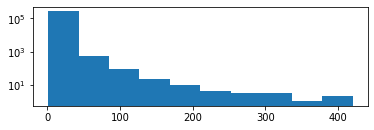

In [7]:
fig = plt.figure()
ax = fig.add_subplot(2, 1, 1)
ax.set_yscale('log')
ax.hist(d)

In [ ]:
# compare across categories


In [ ]:
# look at centralities
i = max(nx.betweenness_centrality(g), key=nx.betweenness_centrality(g.get))
print(i)
print(max(nx.betweenness_centrality(g)))

In [ ]:
# look at gatekeepers

In [ ]:
# look at cycles

In [ ]:
# visualization of graph


In [ ]:
# maybe do hubs/authorities? page rank? 